<a href="https://colab.research.google.com/github/logansmith9454/cse450/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
import seaborn as sns


campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [2]:
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
feature_dict = {'age': (0.6, 0.04),
                'pdays': (0.594, 0.29),

                }

In [113]:
# features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
# features = ['contact', 'month', 'day_of_week']
# features = ['campaign', 'pdays', 'previous', 'poutcome']
# features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# all_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.dropna()

campaign['y'] = campaign['y'].map({'no': 0, 'yes': 1})
campaign['job_cat'] = campaign['job'].astype('category')
campaign['mar_cat'] = campaign['marital'].astype('category')
campaign['edu_cat'] = campaign['education'].astype('category')
campaign['def_cat'] = campaign['default'].astype('category')
campaign['hous_cat'] = campaign['housing'].astype('category')
campaign['loan_cat'] = campaign['loan'].astype('category')
campaign['con_cat'] = campaign['contact'].astype('category')
campaign['mon_cat'] = campaign['month'].astype('category')
campaign['dow_cat'] = campaign['day_of_week'].astype('category')
campaign['pout_cat'] = campaign['poutcome'].astype('category')
campaign['not_contacted'] = (campaign['pdays'] == 999).astype(int)
median_pdays = campaign[campaign['pdays'] != 999]['pdays'].median()
campaign['pdays'] = campaign['pdays'].replace(999, median_pdays)
features = ['age', 'job_cat', 'mar_cat', 'edu_cat', 'def_cat', 'hous_cat', 'loan_cat', 'con_cat', 'mon_cat', 'dow_cat', 'campaign', 'previous', 'pout_cat', 'not_contacted', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

features = ['euribor3m', 'cons.conf.idx', 'nr.employed', 'not_contacted']
X = pd.get_dummies(campaign[features], drop_first=True)
y = campaign['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# # Predict
# y_pred = clf.predict(X_test)
# y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probs for AUC

# # Metrics (focus on F1/ROC-AUC for imbalance)
# print(classification_report(y_test, y_pred))
# print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.3f}')  # Aim for >0.8

# fig, ax = plt.subplots(figsize=(20, 20))
# tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
# plt.show()

0.8991997122560921

In [89]:
# Baseline accuracy
baseline = accuracy_score(y_test, clf.predict(X_test))
print(f"Baseline Accuracy: {baseline:.3f}")

# Permutation importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
importances = result.importances_mean

# Sort individual features
sorted_idx = importances.argsort()[::-1]
print("\nIndividual Feature Importances (Drop in Accuracy):")
for i in sorted_idx:
    print(f"{X.columns[i]}: {importances[i]:.3f} (drop from {baseline:.3f})")

Baseline Accuracy: 0.842

Individual Feature Importances (Drop in Accuracy):
euribor3m: 0.038 (drop from 0.842)
cons.conf.idx: 0.037 (drop from 0.842)
nr.employed: 0.031 (drop from 0.842)
age: 0.016 (drop from 0.842)
not_contacted: 0.015 (drop from 0.842)
mon_cat_oct: 0.006 (drop from 0.842)
campaign: 0.005 (drop from 0.842)
mar_cat_single: 0.005 (drop from 0.842)
job_cat_student: 0.004 (drop from 0.842)
job_cat_technician: 0.004 (drop from 0.842)
cons.price.idx: 0.003 (drop from 0.842)
edu_cat_high.school: 0.003 (drop from 0.842)
dow_cat_thu: 0.002 (drop from 0.842)
def_cat_unknown: 0.002 (drop from 0.842)
previous: 0.002 (drop from 0.842)
edu_cat_university.degree: 0.002 (drop from 0.842)
mar_cat_married: 0.002 (drop from 0.842)
job_cat_retired: 0.002 (drop from 0.842)
dow_cat_wed: 0.002 (drop from 0.842)
emp.var.rate: 0.002 (drop from 0.842)
edu_cat_professional.course: 0.002 (drop from 0.842)
edu_cat_basic.9y: 0.002 (drop from 0.842)
mon_cat_jul: 0.001 (drop from 0.842)
dow_cat_mon

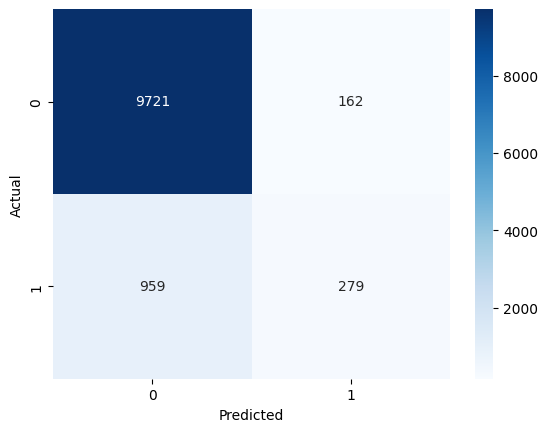

In [120]:
cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [5]:
# mine ^















# A.I. v

In [6]:
url = 'https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv'
df = pd.read_csv(url)  # Note: CSV uses ';' separator
print(df.shape)  # (45211, 17)
print(df.head())
print(df['y'].value_counts(normalize=True))  # Shows imbalance: ~88% 'no'

(37069, 20)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0    

In [7]:
# Target
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Features
X_ai = df.drop('y', axis=1)
y_ai = df['y']

# Identify column types
num_cols = X_ai.select_dtypes(include=[np.number]).columns.tolist()  # age, campaign, etc.
cat_nom_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']  # One-hot
cat_ord_cols = ['education']  # Ordinal only

In [8]:
# pdays: Binary flag + replace 999 with median of contacted
X_ai['not_contacted'] = (X_ai['pdays'] == 999).astype(int)
median_pdays = X_ai[X_ai['pdays'] != 999]['pdays'].median()  # ~18
X_ai['pdays'] = X_ai['pdays'].replace(999, median_pdays)

# Optional: Combine rare months (e.g., <5% freq) into 'other'
month_freq = X_ai['month'].value_counts(normalize=True)
rare_months = month_freq[month_freq < 0.05].index
X_ai['month'] = X_ai['month'].replace(rare_months, 'other')

# Update num_cols (add new)
num_cols.append('not_contacted')

In [9]:
X_train_ai, X_test_ai, y_train_ai, y_test_ai = train_test_split(X_ai, y_ai, test_size=0.2, random_state=42, stratify=y)

In [10]:
# Encoders
ordinal_encoder = OrdinalEncoder(categories=[['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
                                            'professional.course', 'university.degree']], handle_unknown='use_encoded_value', unknown_value=-1)
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Ignore new cats in test

# Transformer: Apply to specific cols
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Scale numerics
        ('ord', ordinal_encoder, cat_ord_cols),  # Ordinal for education
        ('nom', onehot_encoder, cat_nom_cols)  # One-hot for nominal
    ])

# Full pipeline with model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

In [46]:
model.fit(X_train_ai, y_train_ai)
model.score(X_test_ai, y_test_ai)

0.8942541138386836

In [47]:
# Get importances
importances = model.named_steps['classifier'].feature_importances_

# Get feature names (handles one-hot expansion)
num_features = len(num_cols)
ord_features = len(cat_ord_cols)
nom_encoder = model.named_steps['preprocessor'].named_transformers_['nom']
nom_features = sum(len(cats) for cats in nom_encoder.categories_)

feature_names = (list(num_cols) +
                 [f'education_{cat}' for cat in ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
                                                'professional.course', 'university.degree']] +
                 [f'{col}_{cat}' for col, cats in zip(cat_nom_cols, nom_encoder.categories_) for cat in cats])

# Sort
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = [feature_names[i] for i in indices]

print("Top 10:")
for feat, imp in zip(sorted_features[:10], sorted_importances[:10]):
    print(f"{feat}: {imp:.4f}")

Top 10:
age: 0.1416
euribor3m: 0.1318
campaign: 0.0765
education_illiterate: 0.0650
nr.employed: 0.0592
emp.var.rate: 0.0431
cons.conf.idx: 0.0298
cons.price.idx: 0.0230
month_apr: 0.0218
marital_married: 0.0183


In [12]:
# Predict
y_pred = model.predict(X_test_ai)
y_pred_proba = model.predict_proba(X_test_ai)[:, 1]  # Probs for AUC

# Metrics (focus on F1/ROC-AUC for imbalance)
print(classification_report(y_test_ai, y_pred))
print(f'ROC-AUC: {roc_auc_score(y_test_ai, y_pred_proba):.3f}')  # Aim for >0.8

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6572
           1       0.56      0.31      0.40       842

    accuracy                           0.89      7414
   macro avg       0.74      0.64      0.67      7414
weighted avg       0.88      0.89      0.88      7414

ROC-AUC: 0.773
